In [1]:
# On importe les librairies dont on aura besoin pour la Question4
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text
from sklearn import tree
from sklearn import metrics
from pylab import *

In [2]:
# On charge le dataset d'entrainement et de test
Training_Set = pd.read_csv('../Data/Adult_train.csv', sep=',')
Testing_Set = pd.read_csv('../Data/Adult_test.csv', sep=',')

In [3]:
##__traitement des donnee__##

#on extrait les features des 2 dataset 
feature_Training_Set =  Training_Set.drop(['salary'],axis=1)
feature_Testing_Set =  Testing_Set.drop(['salary'],axis=1)

# on extrait les étiquettes de classe de l'échantillon d'apprentissage
target_Training_Set = Training_Set['salary']
target_Testing_Set = Testing_Set['salary']

#on extrait le nom des features pour remplacer les numero par leur nom respective dans le graphe de l'abre
names_features=[]
with open ("../Data/Adult_train.csv", "r") as f: # ouverture du fichier en mode lecture
    names_features = f.readline().strip().split(",")  # on enlève les caractères de fin de ligne et on découpe en colonnes

#on supprime le dernier nom 'salary' de la liste des noms
del names_features[len(names_features) -1]

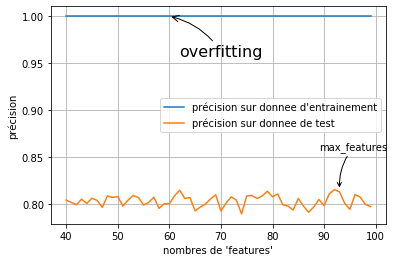

In [4]:
##__Construction d'un modèle d'arbre de décision__##

accuracy_Training = []
accuracy_Testing = []

for i in range(40,100):
    decision_tree = DecisionTreeClassifier(random_state=0, max_features= i, criterion="entropy")
    decision_tree.fit(feature_Training_Set, target_Training_Set)
    
    a=decision_tree.score(feature_Training_Set, target_Training_Set)
    accuracy_Training.append(a)
    b=decision_tree.score(feature_Testing_Set, target_Testing_Set)
    accuracy_Testing.append(b)
    
plt.plot(range(40,100), accuracy_Training, label ="précision sur donnee d'entrainement")
plt.plot(range(40,100), accuracy_Testing, label ="précision sur donnee de test")
plt.ylabel("précision")
plt.xlabel("nombres de 'features'")
plt.legend()
plt.grid(True)


annotate(r'max_features', xy=(1+40+ accuracy_Testing.index(max(accuracy_Testing)),max(accuracy_Testing)),
         xytext=(-20, 40), textcoords='offset points', fontsize=10,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))


annotate(r'overfitting', xy=(60,1),
         xytext=(+10, -40), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))


plt.savefig('../doc/Q4_Evolution_des_Courbes_precision_(max_features=[1-100]).pdf')

In [5]:
index_tree = [["Training", "Testing"],
              [max(accuracy_Training),max(accuracy_Testing)],
              [1+40+accuracy_Training.index(max(accuracy_Training)),1+40+accuracy_Testing.index(max(accuracy_Testing))]]

Taille_ligne = 57
espace = 13
print ("MEILLEUR PROFONDEUR DE L'ABRE:\n\n")

print (" "*espace,"+","-"*(Taille_ligne-espace-1),"+") 
print (" "*espace,"| %20s | %20s |" %(index_tree[0][0] ,index_tree[0][1]),"\n+","-"*Taille_ligne,"+" )
print ("| Profondeur  | %20s | %20s |" %(index_tree[2][0] ,index_tree[2][1]),"\n+","-"*Taille_ligne,"+")
print ("| precision   | %20s | %20s |" %(index_tree[1][0] ,index_tree[1][1]),"\n|" " du Model    |"," "*20,"|"," "*20,"|")
print ("+","-"*Taille_ligne,"+")

MEILLEUR PROFONDEUR DE L'ABRE:


              + ------------------------------------------- +
              |             Training |              Testing | 
+ --------------------------------------------------------- +
| Profondeur  |                   41 |                   93 | 
+ --------------------------------------------------------- +
| precision   |                  1.0 |   0.8153200419727177 | 
| du Model    |                      |                      |
+ --------------------------------------------------------- +
